In [3]:
import math
import matplotlib.pyplot as plt
import numpy as np 

[0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.825, 0.495, 0.495, 0.495, 0.495, 0.495, 0.495, 0.495, 0.495, 0.165, 0.165, 0.165, 0.165, 0.165, 0.165, 0.165]


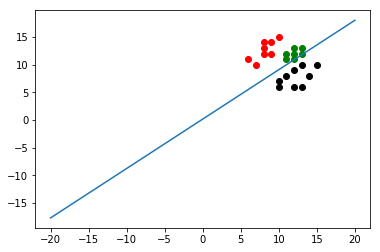

In [7]:
# q represents the number of iteratons and p represents the test case that has been considered
# data is linearly seperable yay!

def sigmoid(x):
  return 1 / (1 + math.exp(-x))






def main():
    class1 = [[15,10,1],[13,6,1],[14,8,1],[12,9,1],[10,7,1],[12,6,1],[11,8,1],[13,10,1],[10,6,1]]
    class2 = [[8,12,1],[6,11,1],[8,14,1],[9,14,1],[10,15,1],[9,12,1],[7,10,1],[8,13,1]]
    class3 = [[12,12,1],[11,12,1],[12,11,1],[11,11,1],[12,13,1],[13,12,1],[13,13,1]]
    tempx = []
    tempy=[]
    tempx2 = []
    tempy2=[]
    tempx3 = []
    tempy3=[]

    for i in range(0,len(class1)):
        tempx.append( class1[i][0])
        tempy.append( class1[i][1])
    for i in range(0,len(class2)):
        tempx2.append( class2[i][0])
        tempy2.append( class2[i][1])
    for i in range(0,len(class3)):
        tempx3.append( class3[i][0])
        tempy3.append( class3[i][1])
    #plt.scatter(tempx,tempy)
    plt.plot(tempx, tempy, 'o', color='black')
    plt.plot(tempx2, tempy2, 'o', color='red')
    plt.plot(tempx3, tempy3, 'o', color='green')

    params = [0.01,0.01,0.01]
    errorArr=[]
    iteration=[]
    eta = 0.00001
    trials = 10000
    #trials = 1
    train = []
    classes = []

    for i in range(0,len(class1)+len(class2)+len(class3)):
        if i <len(class1):
            train.append(class1[i])
            #classes.append(0)
            classes.append(0.825)
        elif i >= len(class1) and i<len(class1)+len(class2):
            train.append(class2[i-len(class1)])
            #classes.append(1)
            classes.append(0.495)
        elif i >= len(class1)+len(class2):
            train.append(class3[i - len(class1) - len(class2)])
            #classes.append(2)
            classes.append(0.165)
    print(classes)
   
    for q in range(0,10000):
        
        #for p in range(0,len(class1) + len(class2)):
        delE = [0,0,0]
        #classes = []
        error=0.0
        OdArr = []
        """#params = [0.1,0.1,0.1]
        OdArr = []
        testClass = None
        if p >= len(class1):
            testClass = 0
        else:
            testClass = 1
        train = []
        test = []
        
        if testClass == 1:
            test.append(class1[p])
            for j in range(0,len(class1)):
                if j!=p:
                    train.append(class1[j])
                    classes.append(0.825) #0.165,0.495,0.825
            for j in range(0,len(class2)):
                train.append(class2[j])
                classes.append(0.495)
            for j in range(0,len(class3)):
                train.append(class3[j])
                classes.append(0.165)"""
        """else:
            test.append(class2[p-len(class1)])
            for j in range(0,len(class1)):
                train.append(class1[j])
                classes.append(0.9)
            for j in range(0,len(class2)):
                if j!= p - len(class1):
                    train.append(class2[j])
                    classes.append(0.1)"""
                
           



        for i in range(0,len(train)):
            y = params[0]*train[i][0] + params[1]*train[i][1] + params[2]*train[i][2]
            #Od = round(sigmoid(y),2)
            Od = sigmoid(y)
            OdArr.append(Od)
            if classes[i] == 0.825:
                if Od < 0.66:
                    for j in range(0,len(delE)):
                        delE[j]+= (classes[i] - Od) * Od * (1-Od) * train[i][j]
                        error+= (1.0/2) * ((classes[i] - Od)**2)
                        
            elif classes[i] == 0.495:
                if Od>0.66 or Od<0.33:
                    for j in range(0,len(delE)):
                        delE[j]+= (classes[i] - Od) * Od * (1-Od) * train[i][j]
                        error+= (1.0/2)* ((classes[i] - Od)**2)

            elif classes[i] == 0.165:
                if Od>0.33 :
                    for j in range(0,len(delE)):
                        delE[j]+= (classes[i] - Od) * Od * (1-Od) * train[i][j]
                        error+= (1.0/2)* ((classes[i] - Od)**2)
                        

        for j in range(0,len(delE)):
            #delE[j] = - round(delE[j],2)
            delE[j] =  delE[j]
        #print(delE)
        #print(len(delE))
        #print("od values for all train data")
        #print(OdArr)
        #print("Initial params",params)
        for j in range(0,len(params)):
            params[j]+= eta*delE[j]
        #print(" new params  ",params)

        errorArr.append(error)
        #iteration.append(p)
        iteration.append(q)



        """predict = test[0][0] * params[0] + test[0][1]*params[1] + test[0][2]*params[2]
        predict = sigmoid(predict)
        print("Prediction value",predict)
        if predict>0.5:
            print("Predicted =",1)
            print("Original =,",testClass)
        else:
            print("Predicted =",0)
            print("Original =,",testClass)"""

            #print('\n')
        if q==9999:
            prop = 0
            OdTempArr =[]
            for w in range(0,len(train)):
                trainOd=train[w][0]*params[0] +train[w][1]*params[1] +train[w][2]*params[2] 
                trainOd = sigmoid(trainOd)
                OdTempArr.append(trainOd)
                if trainOd >0.66 and classes[w]==0.825:
                    prop+=1
                elif trainOd <0.66 and  trainOd >0.33 and classes[w]==0.495:
                    prop+=1
                elif trainOd <0.33 and classes[w]==0.165:
                    prop+=1
                #print(prop,len(train))
                #print("accuracy =",round( float (prop)/ len(train) ,3) )
                #print(OdTempArr)
                        
                    



    #print(errorArr[len(errorArr)-1])
    x = np.linspace(-20, 20, 100) 
    y = - (params[0]*x + params[2])/ params[1]
    plt.plot(x,y)
    
   # plt.plot(iteration,errorArr)
    

main()